# DataFrames Intermediate

<img src=media/pandas.jpg title="Photo by Ramaz Bluashvili on Pexels" width=400/>

Welcome to the "DataFrame Intermediate" unit of the Python Academy! In this unit, we will join what we've learned in the units "DataFrames" (Session 1) and in "Functions" (Session 2), put them together and improve our coding skills!

In this notebook, you will learn:
  - Load and preview data
  - Get basic statistics
  - Detect common data problems
  - Handle categorical, strings and datetime variables
  - Aggregate data
  - Visualize data with plots
  - Apply functions on DataFrames
  - Common pandas tricks

The goal of this Unit is to showcase how powerful and flexible the `pandas` package can be, not to detail every functionality to exhaustion. While you are reading this, **think outside the box** and try to come up with **other things you'd like to see happening** with your data. Then, google them! Really, even the most senior developers google things everyday and it is fine. Programmers are paid to deliver, not to remember everything from hearth without internet access (most of them at least).

<div class="alert alert-warning">
    💡 <b>TIP</b>: <b>Think outside the box</b>, imagine what you'd like to see happening and google how to do it with pandas.
</div>

In [1]:
import pandas as pd

Before we start, remember when we talked about functions and methods? How methods are functions associated with objects/classes? The majority of the examples in this unit are exactly that. We will not create the functions from scratch to handle operations in DataFrames, we will leverage the ones already developed and documented in the [pandas docs](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html), which are tightly associated with the `pandas` objects (e.g. `Series`, `DataFrame`).

Leveraging the code already developed by pandas maintainers enable us to:
  1. **Re-use code** already developed. Avoid the need to reinvent the wheel.
  2. Use **optimized code**. Most likely, pandas native code will be faster than yours for the same functionality.

Whenever we have operations that act on columns and/or rows, the convention is to operate on `axis=0` for index (i.e. rows) and `axis=1` for columns.

## Load, Preview Data

To check how functions work in DataFrames, let's create a `DataFrame` with the [Spotify's Top 100 Songs of 2010-2019](https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019). For now, we leverage the [`.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to easily import our dataset. Handling more file types will be covered in a follwing session.

By convention (only), DataFrames are usually referred to `df` as a variable name.

After importing the data, to guarantee its correctness we can:
  - preview first rows with `.head()`
  - preview last rows with `.tail()`
  - get general properties with `.info()`;
  - get statistical properties with `.describe()`

In [2]:
# load data into 
df = pd.read_csv("./data/spotify_top100_2010_2019.csv")

In [3]:
# first rows (default 5)
df.head(3)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo


In [4]:
df.sample(6)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
677,Same Old Love,Selena Gomez,dance pop,2015,2020‑06‑08,98,59,67,-4,21,44,229,2,3,70,2016,Solo
316,Locked out of Heaven,Bruno Mars,dance pop,2012,2020‑06‑11,144,70,73,-4,31,87,233,5,4,91,2013,Solo
63,What's My Name?,Rihanna,barbadian pop,2010,2022‑02‑17,100,78,69,-3,8,56,263,18,7,75,2010,Solo
823,Nevermind,Dennis Lloyd,israeli pop,2017,2020‑06‑22,100,69,60,-8,41,8,157,16,20,79,2018,Solo
392,Sweater Weather,The Neighbourhood,modern alternative rock,2013,2020‑06‑11,124,81,61,-3,10,40,240,5,3,95,2013,Band/Group
515,Five More Hours,Deorro,dance pop,2017,2020‑06‑19,128,88,70,-3,82,50,212,3,22,74,2015,Solo


In [4]:
# last rows (default 5)
df.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138,58,53,-6,10,59,214,1,10,67,2019,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019,2020‑06‑22,98,59,80,-7,13,18,200,2,15,75,2019,Solo


In [5]:
# general properties
df[["title", "year released", "bpm", "top year"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   year released  1000 non-null   int64 
 2   bpm            1000 non-null   int64 
 3   top year       1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [6]:
# statistical properties
df.describe()

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


## Basic Statistics

Pandas provides a ton of useful methods for statistical properties by default.

| Method                    | Description                                                                                                   |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| `.count()`                | counts the number of non-NAs                                                                                  |
| `.sum(),` `.cumsum()`     | sum of values, cumulative sum of values                                                                       |
| `.nunique()`              | count number of distinct elements                                                                             |
| `.value_counts()`         | count of distinct elements                                                                                    |
| `.mean()`, `median()`     | mean of values (i.e. average), median of values                                                               |
| `.mode()`                 | most frequent value                                                                                           |
| `.min()`, `.max()`        | minimum, maximum of values                                                                                    |
| `.idxmin()`, `.idxmax()`  | index of minimum, maximum values                                                                              |
| `.var()`, `.std()`        | unbiased variance, sample standard deviation                                                                  |
| `.quantile(q=0.2)`        | values at given quantile (q, default 0.5)                                                                     | 
| `.skew()`, `.kurt()`      | unbiased [skew](https://en.wikipedia.org/wiki/Skewness), [kurtosis](https://en.wikipedia.org/wiki/Kurtosis)   |
| `.cov()`                  | pairwise covariance between columns
| `.corr()`                 | pairwise correlation between columns

## Data Problems

A lot of messy stuff can occur with our datasets. We always hope for the best, but most of the time (always..) our data is not how we hoped for. To help us out,

| Method                    | Description                                                                                                   |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| `.isna()`                 | detects missing values. alias `.isnull()`                                                                     |
| `.fillna()`               | fills missing values                                                                          
| `.duplicated()`           | detects duplicated rows
| `.drop_duplicates()`      | removes duplicated rows


## Categoricals, Strings and Datetimes

In general programming, an **accessor** works by fetching private data stored within an object. In pandas, the accessors work as an interface for additional methods specifically built for categorical data (`.cat`), string data (`.str`) and datetime data (`.dt`). We provide a list of some useful functionalities below; for additional functionality refer to documentation links provided below.

### `.cat`

Official docs for [`.Series.cat`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html).

| Method                            | Description                                           |
|-----------------------------------|-------------------------------------------------------|
| `Series.cat.categories`           | displays or assigns of a categorical                  |
| `Series.cat.rename_categories()`  | rename categories
| `Series.cat.add_categories()`                | add categories           |
| `Series.cat.remove_unused_categories()`                | removes categories not in use |

### `.str`

Pandas provides vectorized [string methods](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html?highlight=str) with `.str` for Series and Index, that perform common operations for dealing with text variables.

| Method                    | Description                                           |
|---------------------------|-------------------------------------------------------|
| `.str.lower()`, `.str.upper()`  | converts to lowercase, uppercase                  |
| `.str.strip()`                | removes leading and trailing characters           |
| `.str.replace()`              | replace each occurrence of pattern/regex          |
| `.str.split()`                | split strings around given separator/delimiter    |
| `.str.cat()`              | concatenate strings with given separator          |

### `.dt`

[Official docs](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html) for `.Series.dt`.

| Method                                    | Description                                           |
|-------------------------------------------|-------------------------------------------------------|
| `pd.date_range()`                         | creates a range of datetime values          |
| `pd.to_datetime()`                        | converts to datetime |
| `.dt.{second, minute, hour, quarter} `    | displays datetime properties of values          |

## Subsetting Data

One of the main objectives of functionalities that we can think is filtering our data. This filtering sometimes can be seen as definitive (if we believe them to be wrong) or maybe just for exploratory reasons. Let us see a couple of examples.

Imagine now that you are a fitness instructor and you are interested in choosing songs that are either between 65 and 80 bpm for high resistance and low rythm or above 180 for high pace.

In [6]:
# first 5 songs with bpm above 180
df[ df['bpm'] > 180 ].head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
65,Hard,Rihanna,barbadian pop,2009,2022‑02‑17,182,75,31,-4,65,16,251,1,11,60,2010,Solo
109,Honey Bee,Blake Shelton,contemporary country,2011,2020‑06‑16,206,85,48,-5,12,72,211,0,4,69,2011,Solo
118,Champion (feat. Chris Brown),Chip,grime,2011,2020‑06‑16,190,93,42,-3,14,52,237,8,24,54,2011,Solo
174,When We Stand Together,Nickelback,alternative metal,2011,2020‑06‑16,188,90,45,-4,4,88,191,0,5,71,2011,Band/Group
227,The Motto,Drake,canadian hip hop,2011,2020‑06‑22,202,44,77,-9,11,39,182,0,36,79,2012,Solo


In [8]:
df[(65 < df.bpm) & (df.bpm < 85)].sample(20)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
550,All Eyes on You (feat. Chris Brown & Nicki Minaj),Meek Mill,hip hop,2015,2020‑06‑19,78,66,59,-5,12,25,224,2,20,73,2015,Solo
468,Steal My Girl,One Direction,boy band,2014,2020‑06‑10,77,77,54,-6,11,55,228,0,3,84,2014,Band/Group
122,Jar of Hearts,Christina Perri,dance pop,2011,2020‑06‑16,75,35,35,-6,12,9,247,73,3,77,2011,Solo
754,Liability,Lorde,art pop,2017,2021‑06‑25,76,23,59,-11,10,38,172,92,13,79,2017,Solo
478,Stay With Me,Sam Smith,dance pop,2014,2020‑06‑10,84,42,42,-6,11,18,173,59,4,86,2014,Solo
356,High Hopes,Kodaline,irish pop,2013,2020‑06‑11,77,49,49,-6,19,22,230,58,3,73,2013,Band/Group
636,Say It (feat. Tove Lo),Flume,australian dance,2016,2020‑06‑29,75,53,60,-7,6,26,263,7,3,64,2016,Solo
439,Trumpets,Jason Derulo,dance pop,2013,2020‑06‑10,82,69,64,-5,10,64,217,56,26,69,2014,Solo
200,Skyfall,Adele,british soul,2012,2020‑06‑22,76,55,35,-7,11,8,286,42,3,80,2012,Solo
163,6 Foot 7 Foot,Lil Wayne,hip hop,2011,2020‑06‑16,79,75,37,-5,32,60,249,0,30,77,2011,Solo


What if we wanted modern songs (from 2018 on), but that do not fall in the Solo category?

In [9]:
# In here ~ allows us to negate the condition
df[(df['year released'] >= 2018) & ~(df['artist type']=='Solo')].sample(5)
df[(df['year released'] >= 2018) & (df['artist type']!='Solo')].sample(5)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
837,Simple,Florida Georgia Line,contemporary country,2019,2020‑06‑22,200,88,36,-4,15,86,185,8,10,75,2018,Duo
757,broken,lovelytheband,indie poptimism,2018,2021‑06‑25,123,73,67,-6,4,51,205,0,4,76,2017,Band/Group
942,Only Human,Jonas Brothers,boy band,2019,2020‑06‑22,94,50,80,-6,6,87,183,11,7,76,2019,Band/Group
880,Powerglide (feat. Juicy J) - From SR3MM,Rae Sremmurd,hip hop,2018,2020‑06‑22,174,83,71,-5,12,58,332,2,15,71,2018,Duo
876,Déjala Que Vuelva (feat. Manuel Turizo),Piso 21,colombian pop,2018,2020‑06‑22,170,79,68,-4,8,84,220,5,8,76,2018,Band/Group


What if I want to see only the hip hop or modern rock songs?

In [20]:
df[(df['top genre']=='hip hop') | (df['top genre']=='modern rock')].sample(5)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
880,Powerglide (feat. Juicy J) - From SR3MM,Rae Sremmurd,hip hop,2018,2020‑06‑22,174,83,71,-5,12,58,332,2,15,71,2018,Duo
239,It's Time,Imagine Dragons,modern rock,2012,2020‑06‑22,105,88,66,-5,14,86,238,2,4,72,2012,Band/Group
793,goosebumps,Travis Scott,hip hop,2016,2021‑01‑28,130,73,84,-3,15,43,244,8,5,88,2017,Solo
342,Demons,Imagine Dragons,modern rock,2012,2020‑06‑11,90,71,51,-3,33,43,175,19,3,78,2013,Band/Group


In [10]:
# Alternatively, I can also use the isin function to select a bunch of classes
df[df['top genre'].isin(['hip hop', 'modern rock', 'melodic rap', 'chicago rap'])].sample(5)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
588,Antidote,Travis Scott,hip hop,2015,2020‑06‑19,131,53,71,-5,12,13,263,1,3,78,2015,Solo
957,Ransom,Lil Tecca,melodic rap,2019,2020‑06‑22,180,64,75,-6,7,23,131,2,29,83,2019,Solo
903,Look Back at It,A Boogie Wit da Hoodie,melodic rap,2018,2020‑06‑22,96,59,79,-5,15,54,179,41,4,78,2019,Solo
358,Love Me,Lil Wayne,hip hop,2013,2020‑06‑11,125,63,67,-6,9,50,255,1,3,73,2013,Solo
976,Pop Out (feat. Lil Tjay),Polo G,chicago rap,2019,2020‑06‑22,168,64,77,-7,7,26,167,15,47,83,2019,Solo


## Aggregate Data

You can leverage pandas to [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html) and explore your data aggregated by a specific entity.

In [7]:
# average bpm per year on top
df.groupby('top year').mean()['bpm']

top year
2010    119.56
2011    127.29
2012    123.10
2013    119.91
2014    119.73
2015    120.86
2016    115.77
2017    122.02
2018    120.55
2019    123.83
Name: bpm, dtype: float64

## Plots

Pandas provides plotting functionality, which is fairly sufficient for us to get a glimpse of our dataset without the need of importing other visualization packages (e.g. matplotlib, seaborn). These are available in [`DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) of 

<AxesSubplot:title={'center':'Average bpm per Year'}, xlabel='top year'>

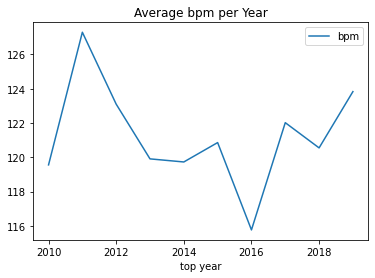

In [8]:
df.groupby('top year').mean()[['bpm']].plot(title='Average bpm per Year')

In [12]:
df.value_counts('artist').head(10)#.plot(kind='bar', title='Top 10 Artists with most Top Songs')

artist
Taylor Swift     21
Calvin Harris    18
Drake            18
Rihanna          14
Ariana Grande    14
Bruno Mars       13
Maroon 5         11
Chris Brown      10
Jason Derulo     10
Ed Sheeran       10
dtype: int64

<AxesSubplot:title={'center':'Top 10 Artists with most Top Songs'}, xlabel='artist'>

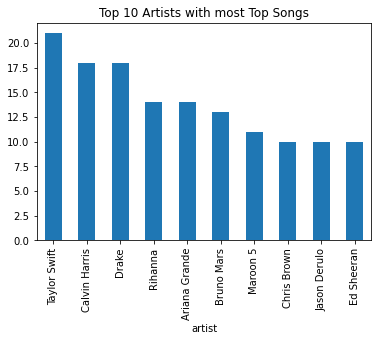

In [9]:
df.value_counts('artist').head(10).plot(kind='bar', title='Top 10 Artists with most Top Songs')

### Multiple Plots

If you plot multiple plots in the same cell, you can see that they are printed separately. When we want to have them in the **same figure**, we make sure they **share the same axis**. 

The `pandas.DataFrame.plot()` method returns (one or many) [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), depending on the way you call it. While this `Axes` class can get quite tricky really fast, for now we can simply store the axis returned by the first plot and provide it as an argument for the second `.plot()` call. In this way, we let Pandas know they should be displayed in the same picture.

The `ax` object you get may also be helpful to define other properties about the visualization (e.g. legend, title).

Text(0.5, 1.0, 'Min, Max BPMs per Top Year')

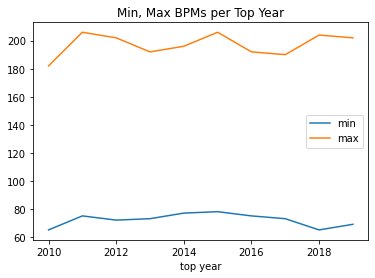

In [10]:
ax = df.groupby('top year').min()['bpm'].plot()
ax = df.groupby('top year').max()['bpm'].plot(ax=ax)
ax.legend(['min', 'max'])
ax.set_title('Min, Max BPMs per Top Year')

We can also calculate multiple aggregate functions over a groupby and plot them all together! Instead of calling the function directly after the groupby, the `.agg()` method accepts a dictionary of `{column_name: agg_function}`, where `agg_function` can be:
  - one function as string, `{'bpm': 'mean'}`); or
  - many functions as a list of strings, `{'bpm': ['min', 'max']}`

<AxesSubplot:title={'center':'Min, Max and Average BPMs per Top Year'}, xlabel='top year'>

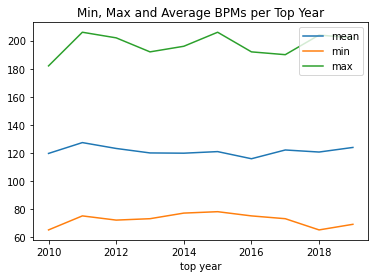

In [11]:
df.groupby('top year').agg({'bpm': ['mean', 'min', 'max']})['bpm'].plot(title='Min, Max and Average BPMs per Top Year')

## Applying Functions over DataFrames

Sometimes, we need more than what is provided with pandas methods. Pandas supports multiple methods for creating/updating data into existing Series and DataFrames.

| Method                            | Description                                               |
|-----------------------------------|-----------------------------------------------------------|
| Arithmetic Operations             | add, subtract, divide and multiply all values in a Series |
| `.apply`                          | apply a function along an axis                            |
| `.applymap`                       | apply a function to a DataFrame elementwise               |
| `.assign`                         | assign new columns to a DataFrame                         |

In [12]:
from math import sqrt

In [13]:
# set a new column
df['sqrt_bpm'] = df['bpm'].apply(sqrt)                   # square root the BPM's

# assign. returns a new DataFrame
df2 = df.assign(double_bpm= df['bpm'] * 2)               # double the speed!

## Notorious Tips

*Tweaks and tips that can help you better understand your data and code better with pandas*.

| Method                    | Description                                                                                                   |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| `pd.set_option(display.max_rows, 100)`      | change the maximum number of displayed rows                                       |
| `df.rename(columns={my_dict})`              | rename the columns using a dict mapping
| `df.select_dtypes()`                        | subsets columns by data type
| `df.sort_values(by=colA, ascending=False)`  | sort values by column
| `pd.cut()`                                  | sort data values into interval bins
| `pd.concat([df1, df2])`                     | merge several DataFrames




## Recap

Congratulations, you made it all the way "DataFrame Intermediate" unit! We know this is a lot of information and functionalities to take in, but rest assured you will become fluent when you start using pandas on a frequent basis. By the end of this notebook, you should have a clear idea of:
  1. Load data from a CSV file
  2. Perform exploratory data analysis on a DataFrame
  3. Manipulate categorical, string and datetime variables
  4. Aggregate data
  5. Visualize data with plots
  6. Apply functions on Pandas objects
  7. Most common tweaks and tips